# DATDRD05-T07 - Introduction to modelling Final assignment Niels Velderman 1552285

In [119]:
# Basic libraries for data manipulation and visualization
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Statsmodels for regression and statistical analysis
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Model evaluation and formatting
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# Preprocessing and model selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV

# Machine learning models
from sklearn.linear_model import LinearRegression, Ridge

# Deep learning with TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Numerical operations
from numpy import mean, absolute



   Months_active  Distance_from_work  Age Disciplined  Children  \
0             14                3.10   34          no         2   
1              9                4.50   28          no         1   
2             16                4.92   41          no         0   
3             29                5.78   49          no         0   
4             18                3.58   38          no         0   

  Social_drinker Social_smoker  Pets  Weight  Height  BMI  Absent_hours  
0            yes            no     0      95     196   25            80  
1             no            no     2      69     169   24             1  
2            yes            no     0      67     170   23             8  
3             no            no     2     108     172   36             2  
4            yes            no     0      89     170   31             2  
                    Months_active  Distance_from_work       Age  Children
Months_active            1.000000           -0.327720  0.666469 -0.050419
Dista

Text(0.5, 1.0, 'Figure 1.1 Correlation Heatmap')

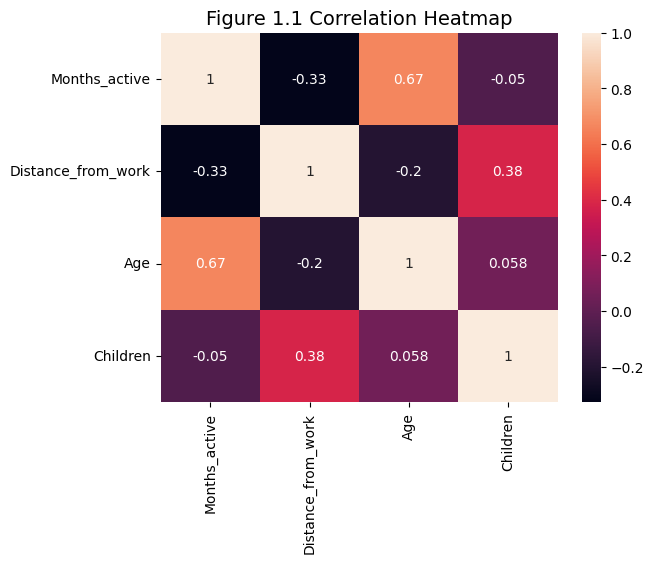

In [120]:
#Assignment 1.1: creating a correlation heatmap 

#import the data
df = pd.read_excel('1552285turnover.xlsx')
print(df.head())

#creating a correlation matrix
Data_relevant = df[['Months_active','Distance_from_work','Age','Children']]
matrix = Data_relevant.corr()

print(matrix)

#creating a correlation heatmap 
sn.heatmap(matrix, annot=True)
plt.title("Figure 1.1 Correlation Heatmap", fontsize=14)

Text(0.5, 1.02, 'Figure 1.2 Scatterplot Matrix')

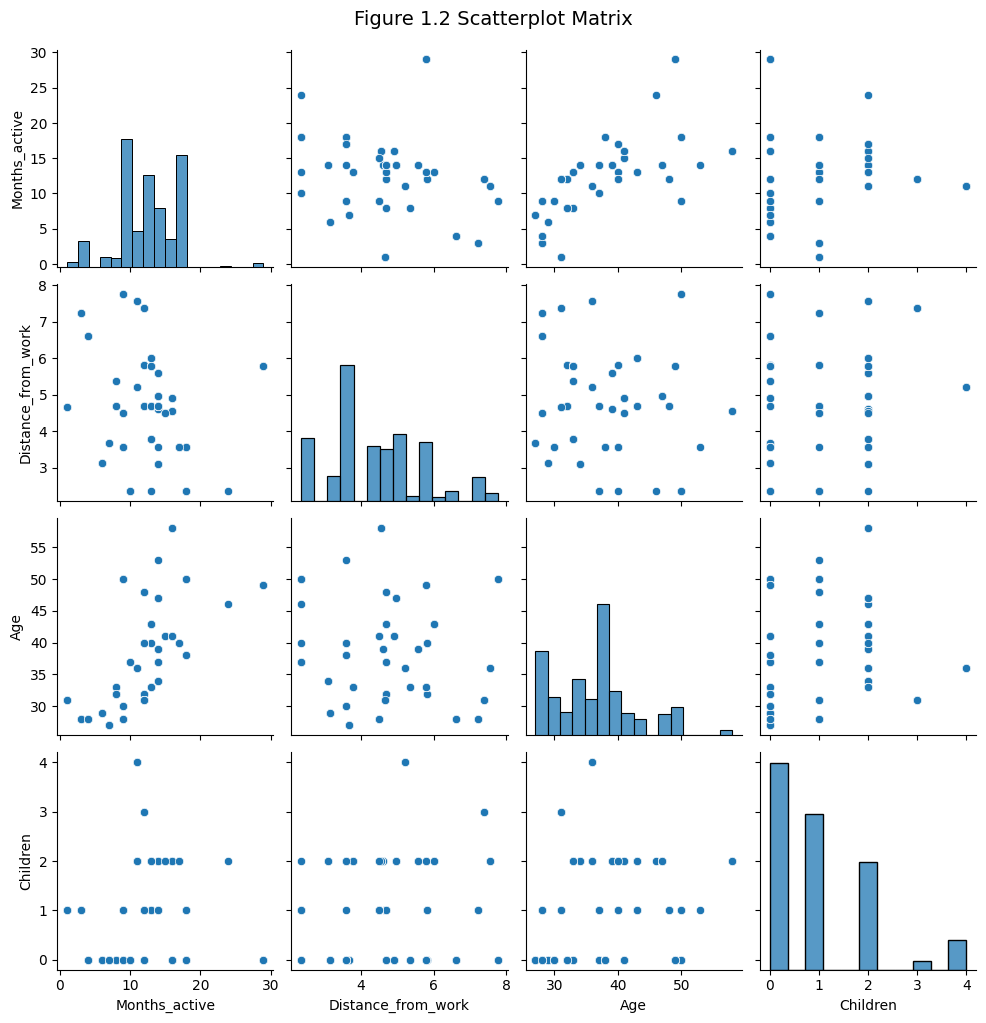

In [121]:
#assignment 1.2: Scatterplot Matrix

pairplot = sn.pairplot(Data_relevant)
pairplot.fig.suptitle("Figure 1.2 Scatterplot Matrix", fontsize=14, y=1.02) 

In [122]:
# Assignment 2.1: creating dummy variables

df_dummies = pd.get_dummies(df[['Disciplined','Social_drinker','Social_smoker']],dtype=int)
df_dummies.head()

df = pd.concat([df,df_dummies],axis=1)
df.head()



,Months_active,Distance_from_work,Age,Disciplined,Children,Social_drinker,Social_smoker,Pets,Weight,Height,BMI,Absent_hours,Disciplined_no,Disciplined_yes,Social_drinker_no,Social_drinker_yes,Social_smoker_no,Social_smoker_yes
0,14,3.10,34,no,2,yes,no,0,95,196,25,80,1,0,0,1,1,0
1,9,4.50,28,no,1,no,no,2,69,169,24,1,1,0,1,0,1,0
2,16,4.92,41,no,0,yes,no,0,67,170,23,8,1,0,0,1,1,0
3,29,5.78,49,no,0,no,no,2,108,172,36,2,1,0,1,0,1,0
4,18,3.58,38,no,0,yes,no,0,89,170,31,2,1,0,0,1,1,0


In [123]:
# Assignment 2.1: regression model with Months_active as dependent variable and all independent variables

model1 = sm.ols('Months_active ~ Distance_from_work + Age + Children + Pets + Weight + Height + BMI + Absent_hours + Disciplined_yes + Social_drinker_yes + Social_smoker_yes',data=df).fit()
print(model1.summary())
       


                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     113.1
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          2.72e-143
Time:                        16:07:18   Log-Likelihood:                -1568.8
No. Observations:                 666   AIC:                             3162.
Df Residuals:                     654   BIC:                             3216.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             90.6150     15

In [124]:
# Assigment 2.2: check for multicollinearity (with the use of VIF using all variables)

X = df[['Distance_from_work', 'Age', 'Children',
        'Pets', 'Weight', 'Height', 'BMI',
       'Absent_hours', 'Disciplined_yes',
        'Social_drinker_yes',
       'Social_smoker_yes']].dropna()  # select the relevant variables and delete missing values
X = add_constant(X)  # add a constant to the variables. VIF WON'T WORK CORRECTLY IF YOU DON'T DO THIS

# Create a dataframe that contains the VIF values
VIF_data = pd.DataFrame()  # create a pandas dataframe
VIF_data["variable"] = X.columns  # create a variable that simply lists the names of the variables you picked
VIF_data["VIF"] = [vif(X, i) for i in range(len(X.columns))]  # a loop that creates VIF values for each variable and then puts it in the VIF column

print(VIF_data)  # print the results

              variable           VIF
0                const  23151.003970
1   Distance_from_work      1.616216
2                  Age      1.575206
3             Children      1.322157
4                 Pets      1.353913
5               Weight    156.822682
6               Height     29.176639
7                  BMI    144.795005
8         Absent_hours      1.072987
9      Disciplined_yes      1.075001
10  Social_drinker_yes      1.405524
11   Social_smoker_yes      1.225069


In [125]:
# Assignment 2.2: check for multicollinearity (with the use of VIF using all variables but wwithout the ones with high VIF scores)

X = df[['Distance_from_work', 'Age', 'Children',
        'Pets', 'BMI',
       'Absent_hours', 'Disciplined_yes',
        'Social_drinker_yes',
       'Social_smoker_yes']].dropna()  # select the relevant variables and delete missing values
X = add_constant(X)  # add a constant to the variables. VIF WON'T WORK CORRECTLY IF YOU DON'T DO THIS

# Create a dataframe that contains the VIF values
VIF_data = pd.DataFrame()  # create a pandas dataframe
VIF_data["variable"] = X.columns  # create a variable that simply lists the names of the variables you picked
VIF_data["VIF"] = [vif(X, i) for i in range(len(X.columns))]  # a loop that creates VIF values for each variable and then puts it in the VIF column

print(VIF_data)  # print the results

             variable        VIF
0               const  77.886536
1  Distance_from_work   1.511121
2                 Age   1.559712
3            Children   1.315849
4                Pets   1.326345
5                 BMI   1.620920
6        Absent_hours   1.048284
7     Disciplined_yes   1.073456
8  Social_drinker_yes   1.293417
9   Social_smoker_yes   1.187193


In [126]:
# Assignment 2.2: regression model with Months_active as dependent variable; minus the weight and height as independent variables 
model2 = sm.ols('Months_active ~ Distance_from_work + Age + Children + Pets + BMI + Absent_hours + Disciplined_yes + Social_drinker_yes + Social_smoker_yes',data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     125.4
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          2.94e-136
Time:                        16:07:18   Log-Likelihood:                -1590.4
No. Observations:                 666   AIC:                             3201.
Df Residuals:                     656   BIC:                             3246.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.7180      0

In [127]:
# Assignment 2.3 APA table for model 1 and 2
Table = Stargazer([model1, model2])

HTML(Table.render_html())

In [128]:
# Assignment 3.2 Creating standardized data

df_s = df.copy()
df_s[['Distance_from_work','Age','Children','Pets','BMI','Absent_hours']] = StandardScaler().fit_transform(df_s[['Distance_from_work','Age','Children','Pets','BMI','Absent_hours']])

df_s.head()


,Months_active,Distance_from_work,Age,Disciplined,Children,Social_drinker,Social_smoker,Pets,Weight,Height,BMI,Absent_hours,Disciplined_no,Disciplined_yes,Social_drinker_no,Social_drinker_yes,Social_smoker_no,Social_smoker_yes
0,14,-0.991120,-0.371873,no,0.896240,yes,no,-0.571721,95,196,-0.377853,5.273384,1,0,0,1,1,0
1,9,0.064221,-1.302369,no,-0.012277,no,no,0.945276,69,169,-0.610432,-0.435895,1,0,1,0,1,0
2,16,0.380824,0.713707,no,-0.920794,yes,no,-0.571721,67,170,-0.843011,0.069991,1,0,0,1,1,0
3,29,1.029106,1.954368,no,-0.920794,no,no,0.945276,108,172,2.180513,-0.363626,1,0,1,0,1,0
4,18,-0.629289,0.248458,no,-0.920794,yes,no,-0.571721,89,170,1.017619,-0.363626,1,0,0,1,1,0


In [129]:
# Assignment 3.2 regression model with standardized data
model3 = sm.ols('Months_active ~ Distance_from_work + Age + Children + Pets + BMI + Absent_hours + Disciplined_yes + Social_drinker_yes + Social_smoker_yes',data=df_s).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     125.4
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          2.94e-136
Time:                        16:07:18   Log-Likelihood:                -1590.4
No. Observations:                 666   AIC:                             3201.
Df Residuals:                     656   BIC:                             3246.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.4797      0

In [130]:
# Assignment 4.1: Normal linear regression with cross validation using 5 folds and mean absolute deviation 

# Prepare the data
df = df.dropna()  # remove missings
y = df['Months_active']  # select Target
X = df.drop('Months_active', axis=1)  # Select features
X = df[['Distance_from_work', 'Age',
        'Pets', 'BMI',
        'Disciplined_yes',
        'Social_drinker_yes',
       'Social_smoker_yes']].dropna()

# Prediction with all features
# define the cross-validation
cv = RepeatedKFold(n_splits=5,  # splits the data into 5 folds
                   random_state=420)  # adding a number here ensures it will be the same each time

# predict with Linear regression
lm = LinearRegression()
lmscores = cross_val_score(lm, X, y,  # these define the type of model, features, and target
                           scoring='neg_mean_absolute_error',  # test using mean absolute deviation
                           cv=cv)  # this loads the cross validation we wrote above

lmMAE = mean(absolute(lmscores))  # Calculate the overall mean absolute error
print('the average prediction error with full data is: %.4f' % lmMAE)  # Print the result


the average prediction error with full data is: 2.1322


In [131]:
# Assignment 4.2: Ridge regression  with data normalization, using 5 folds and alpha=1

# preparing the data
columns = X.columns  # create index with column names (needed for last step)
scaler = MinMaxScaler()  # initiate the scaler
X = scaler.fit_transform(X)  # scale the data
X = pd.DataFrame(X, columns=columns)  # turn back into a dataframe

# Define the model and alpha
RidgeModel = Ridge(alpha=1)

# Run the cross-fold validation
scoresridge = cross_val_score(RidgeModel, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Print the average MAE
ridgeMAE = np.mean(np.abs(scoresridge))  # Calculate the overall mean absolute error
print('The average prediction error with ridge is: %.4f' % ridgeMAE)  # Print the result




The average prediction error with ridge is: 2.1136


In [132]:
# Assignment 4.2: Ridge regression  with data normalization, grid search and using 5 folds for best alpha value 

# Preparing the data
columns = X.columns  # Save column names
scaler = MinMaxScaler()  # Initiate the scaler
X = scaler.fit_transform(X)  # Normalize the data
X = pd.DataFrame(X, columns=columns)  # Convert back to DataFrame

# Define alpha range for grid search
alpha_range = np.arange(start=1, stop=100, step=1)  # 1 to 99

# Define aspects of grid search
cv = RepeatedKFold(n_splits=5)
param = {'alpha':alpha_range}
RidgeModel = Ridge() 

# Set up the grid search for optimal alpha
RidgeM =    GridSearchCV(RidgeModel,
                        param_grid=param,
                        scoring = 'neg_mean_absolute_error',
                        cv=cv)
RidgeM.fit(X,y)
print("Best alpha: ", RidgeM.best_params_['alpha'])

Best alpha:  15


In [133]:
# Assignment 4: Ridge regression  with data normalization, using 5 folds with alpha=14 (best alpha)

# preparing the data
columns = X.columns  # create index with column names (needed for last step)
scaler = MinMaxScaler()  # initiate the scaler
X = scaler.fit_transform(X)  # scale the data
X = pd.DataFrame(X, columns=columns)  # turn back into a dataframe

# Define the model and alpha
RidgeModel = Ridge(alpha=14)

# Run the cross-fold validation
scoresridge = cross_val_score(RidgeModel, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Print the average MAE
ridgeMAE = np.mean(np.abs(scoresridge))  # Calculate the overall mean absolute error
print('The average prediction error with ridge is: %.4f' % ridgeMAE)  # Print the result




The average prediction error with ridge is: 2.0409


In [134]:
#4.3 Neural network
# Define the neural network model
def create_baseline():
    # Create model
    nnmodel = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),  # Input Layer
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 1
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 2
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 3
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 4
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 5
        tf.keras.layers.Dense(1)  # Output Layer
    ])
    
    # Compile model
    nnmodel.compile(loss='mean_absolute_error',  # Loss function: MAE
                    optimizer='adam',  # Optimizer: Adam
                    metrics=['mae'])  # Evaluate with MAE
    
    return nnmodel

# Define the estimator with updated hyperparameters
estimator = KerasRegressor(build_fn=create_baseline,  
                           epochs=100, batch_size=16,  # 100 epochs, batch size of 16
                           verbose=0)  # Suppress output text

# Define the k-fold function
kfold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)  # 5 splits, 1 repeat

# Generate the results
results = cross_val_score(estimator, X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Print the results
print('The average prediction error is: %.4f' % mean(absolute(results)))


C:\Users\niels\AppData\Local\Temp\ipykernel_89896\281497515.py:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=create_baseline,


The average prediction error is: 0.3051
